# Medidas de tendencia central

### Media = $$ \frac{1}{N} \sum_{i=1}^N x_i  $$ 

### Mediana(impar) = $$ x_{(n+1)/2}^{\text{ordered}} $$

### Mediana(par) = $$ \frac{x_{n/2}^{\text{ordered}} + x_{n/2+1}^{\text{ordered}}}{2} $$

### Moda = $$ x_k $$ donde $$ \text{Freq}(x_k) = \max{(\text{Freq}(x_i))} $$ 

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


inspeccionemos el atributo de `price_usd` **(variable numérica continua)** de los autos listados en el dataset:

In [2]:
df['price_usd'].mean()

6639.971021255613

In [3]:
df['price_usd'].median()

4800.0

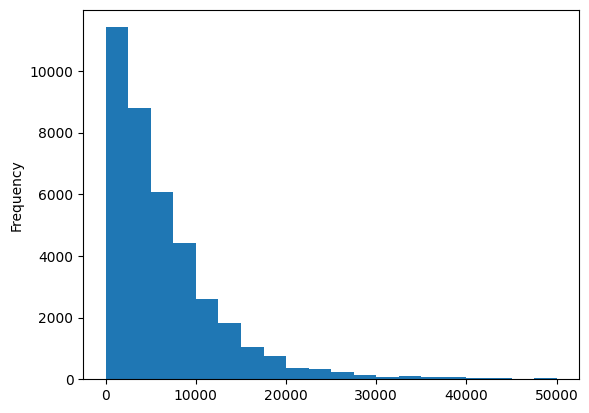

In [12]:
df['price_usd'].plot.hist(bins=20)
plt.show()

resulta más interesante analizar los precios por marcas: 

* **pro tip:** usar seaborn: https://seaborn.pydata.org/tutorial/distributions.html

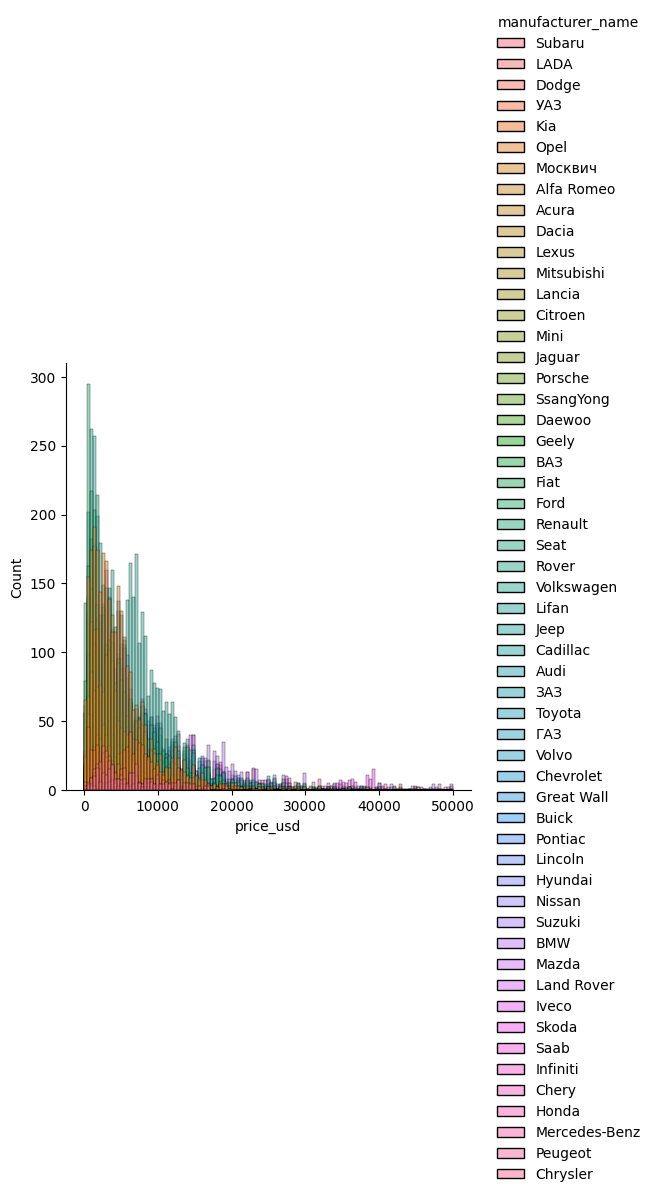

In [4]:
import seaborn as sns

sns.displot(df, x = 'price_usd', hue = 'manufacturer_name')
plt.show()

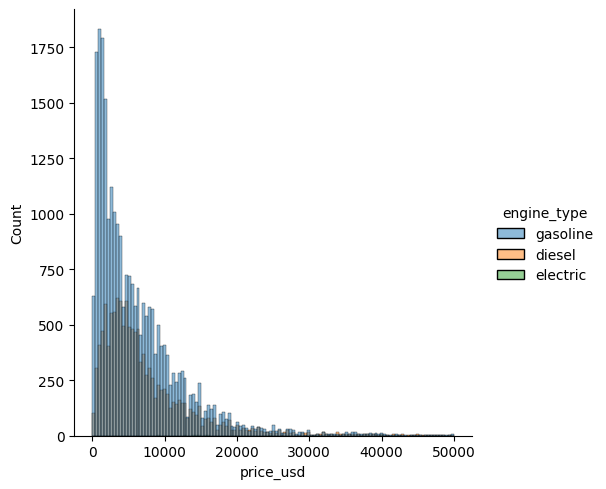

In [4]:
sns.displot(df, x="price_usd", hue="engine_type")
plt.show()

el histograma anterior es muy dificil de analizar, ¿donde están los autos eléctricos?

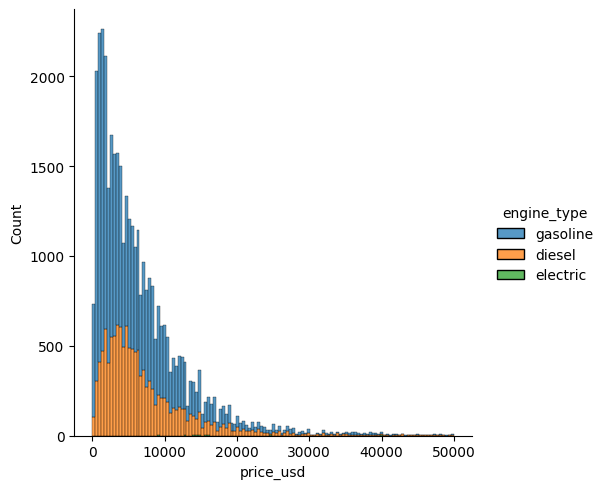

In [5]:
sns.displot(df, x='price_usd', hue = 'engine_type', multiple='stack')
plt.show()

In [8]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


**RETO:** Inspeccionemos precios de una marca y modelo particular !



In [8]:
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
Q7_df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
19515,Audi,Q7,automatic,grey,275000,2007,diesel,False,diesel,3.0,...,False,False,False,False,False,False,False,False,False,21
19547,Audi,Q7,automatic,white,105000,2014,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,216
19559,Audi,Q7,automatic,other,170000,2006,diesel,False,diesel,3.0,...,True,True,True,True,True,False,True,False,True,24
19574,Audi,Q7,automatic,black,185000,2016,diesel,False,diesel,3.0,...,False,False,True,True,True,True,True,True,True,7
19583,Audi,Q7,automatic,other,210000,2010,diesel,False,diesel,4.2,...,True,True,True,False,True,True,True,True,True,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21756,Audi,Q7,automatic,silver,200000,2008,gasoline,False,gasoline,3.6,...,True,True,True,True,True,True,True,True,True,91
21812,Audi,Q7,automatic,black,276000,2008,diesel,False,diesel,4.2,...,True,True,True,True,True,True,True,True,True,115
21873,Audi,Q7,automatic,black,273000,2006,gasoline,False,gasoline,4.2,...,True,True,False,True,True,True,True,False,True,147
21900,Audi,Q7,automatic,white,283000,2007,diesel,False,diesel,4.2,...,True,True,True,True,True,True,True,True,True,159


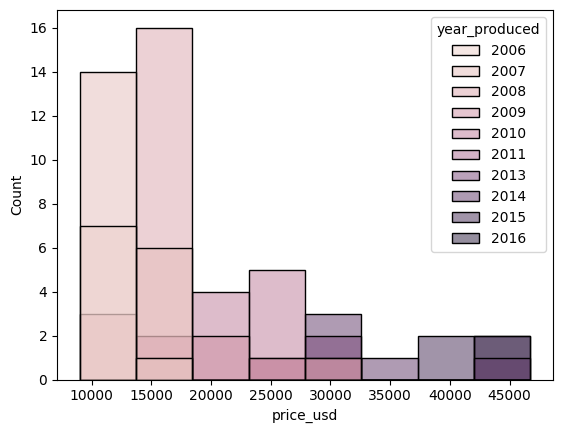

In [6]:
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
sns.histplot(Q7_df, x='price_usd', hue = 'year_produced')
plt.show()

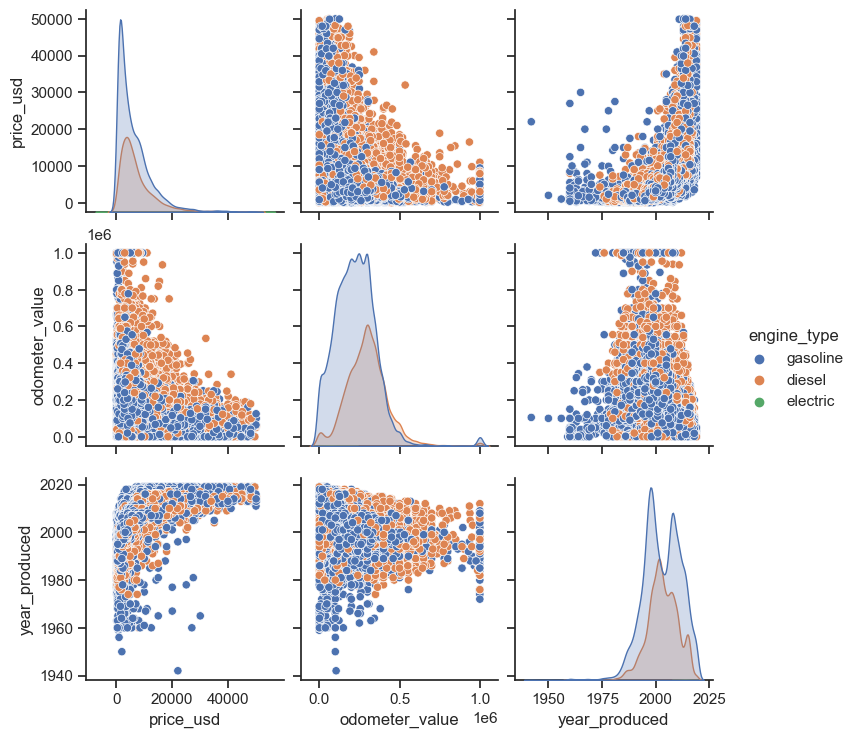

In [5]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars = ['price_usd', 'odometer_value','year_produced'], hue="engine_type")
plt.show()

<AxesSubplot: xlabel='price_usd', ylabel='Count'>

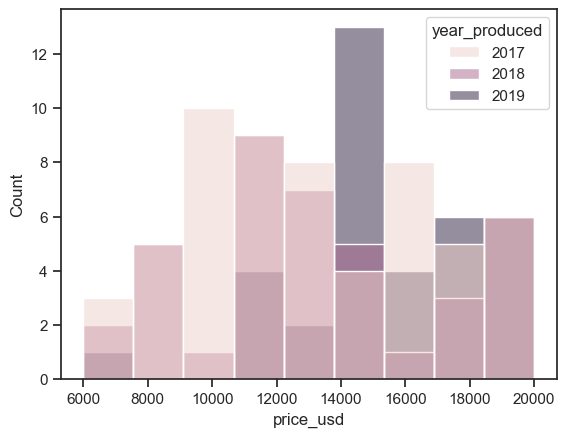

In [6]:
black_cars = df[(df['color'] == 'black')  & (df['price_usd'] <= 20000)  & (df['year_produced'] >= 2017)]
sns.histplot(black_cars, x = 'price_usd', hue = 'year_produced')

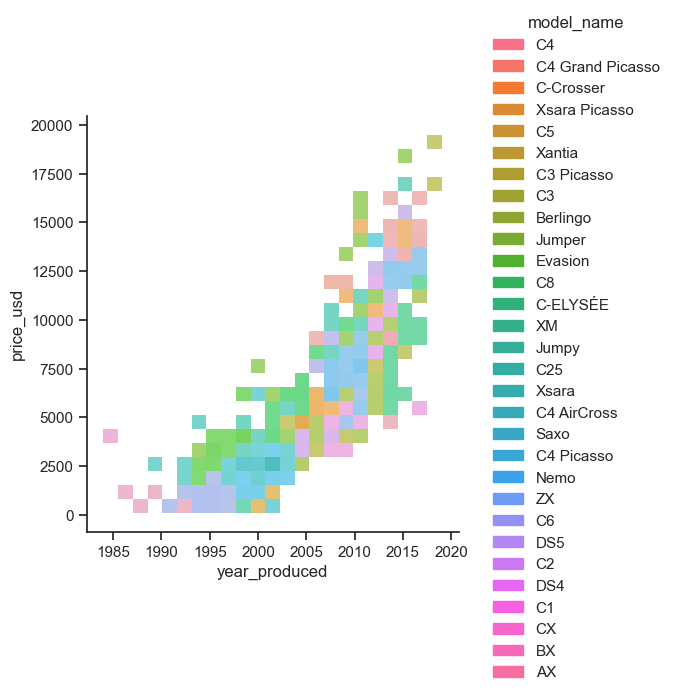

In [7]:
citro = df[(df['manufacturer_name'] == 'Citroen')]
sns.displot(citro, x='year_produced', y='price_usd', hue='model_name')

<AxesSubplot: xlabel='price_usd', ylabel='Count'>

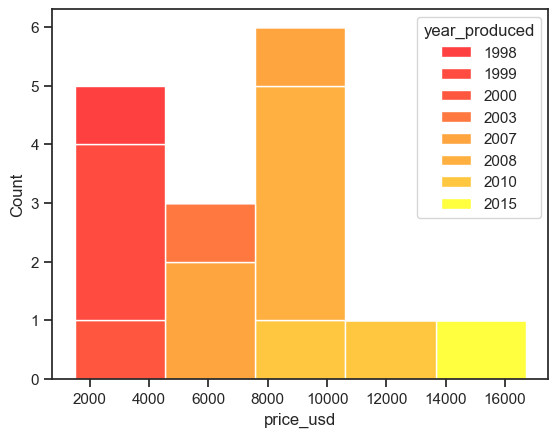

In [11]:
Jumpy = df[(df['manufacturer_name']=='Citroen') & (df['model_name']=='Jumpy')]
sns.histplot(Jumpy, x = 'price_usd', hue = 'year_produced', multiple='stack', palette='autumn')

<AxesSubplot: xlabel='price_usd', ylabel='Count'>

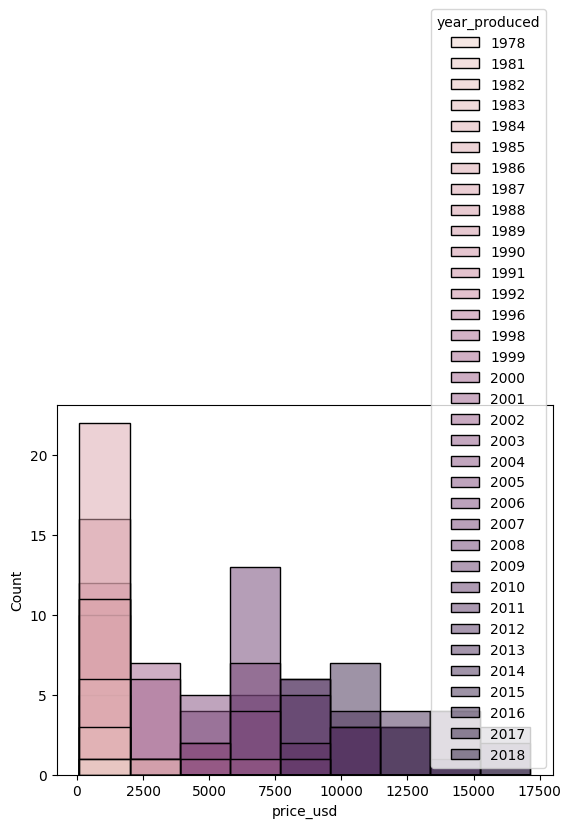

In [8]:
Jetta_df = df[(df['manufacturer_name']=='Volkswagen') & (df['model_name']=='Jetta')]
sns.histplot(Jetta_df, x='price_usd', hue = 'year_produced')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3f569948-e9a8-454f-8f4d-a27aa1610a87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>